# Exploración inicial de los datos y tratamiento de estos.

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Vigilar progreso bucles
# -----------------------------------------------------------------------
from tqdm import tqdm

# Gestionar los warnings
# -----------------------------------------------------------------------
import warnings

# modificar el path
# -----------------------------------------------------------------------
import sys
sys.path.append("..")

# importar funciones de soporte
# -----------------------------------------------------------------------
from src import soporte_preprocesamiento as sup_prep
from src import soporte_nulos as sup_nul

##aplicar configuraciones
#------------------------------------------------------------------------
warnings.filterwarnings('ignore')
pd.set_option('display.max_info_columns', 50)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format) #eliminamos la notacion cientifica

tqdm.pandas()

---
---

## Importamos los datos

In [2]:
df = pd.read_csv('../datos/api_rent_madrid.csv', sep=';')
df.sample(3)

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
442,98457076,17,725.00,studio,rent,44.00,False,0,1,"Calle de Churruca, 2",Madrid,Madrid,es,404.267.756,-37.007.304,True,1140,Se alquila estupenda vivienda tipo estudio de ...,False,good,False,16.00,"{'typology': 'flat', 'subTypology': 'studio'}","{'subtitle': 'Chueca-Justicia, Madrid', 'title...",False,False,False,False,False,False,NaN,8,Centro,Chueca-Justicia,True,NaN,NaN,NaN
209,98892578,28,730.00,flat,rent,60.00,False,3,1,Reyes,Madrid,Parla,es,402.366.913,-37.681.298,False,20756,PROMOCIÓN: 1 MES DE ALQUILER GRATIS si reserva...,False,good,False,12.00,{'typology': 'flat'},"{'subtitle': 'Reyes, Parla', 'title': 'Piso'}",True,False,True,False,False,False,CG-91792-0001,3,Reyes,NaN,False,NaN,NaN,NaN
272,97813902,28,730.00,flat,rent,161.00,True,4,1,Calle de la Cruz,Madrid,Aranjuez,es,400.282.361,-35.950.227,False,44159,PROMOCIÓN SEPTIEMBRE: 1 MES DE ALQUILER GRATIS...,True,good,False,5.00,{'typology': 'flat'},{'subtitle': 'Nuevo Aranjuez-Ciudad de las Art...,True,False,True,False,False,False,7043752-AL,3,Nuevo Aranjuez-Ciudad de las Artes,NaN,False,NaN,NaN,NaN


---
---

## Lo primero de todo, vemos si tenemos duplicados y si es así, los eliminamos.

In [3]:
df.duplicated().sum()

8

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

---
---

## Reaizamos una primera exploración sobre los datos que tenemos.

In [6]:
sup_prep.exploracion_datos(df, info=False)

El número de filas es 442 y el número de columnas es 38

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
propertyCode,442.00,94573262.11,13974749.91,666696.00,97550391.50,98662647.00,98894324.25,98939685.00
numPhotos,442.00,21.85,9.66,0.00,15.00,21.00,28.00,72.00
price,442.00,672.96,83.96,340.00,645.00,700.00,740.00,750.00
size,442.00,67.96,35.87,20.00,46.25,62.00,80.00,371.00
rooms,442.00,1.70,0.98,0.00,1.00,2.00,2.00,6.00
bathrooms,442.00,1.21,0.44,1.00,1.00,1.00,1.00,3.00
distance,442.00,22266.39,16991.27,183.00,7089.00,20001.00,34854.75,59919.00
priceByArea,424.00,11.95,5.37,1.00,8.00,11.00,15.00,33.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,442,6,flat,348
operation,442,1,rent,442
address,442,405,"Calle Valle de Ambles, 2",7
province,442,5,Madrid,353
municipality,442,96,Madrid,170
country,442,1,es,442
latitude,442,433,404.430.651,7
longitude,442,433,-34.659.877,7
description,441,427,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,7
hasVideo,424,2,False,306



----------

Los columnas con valores nulos y sus porcentajes son: 


,%_nulos
newDevelopmentFinished,97.06
labels,93.21
parkingSpace,69.68
neighborhood,60.63
district,24.66
externalReference,23.53
floor,18.33
hasLift,7.01
superTopHighlight,4.07
topNewDevelopment,4.07


### Vamos a verlo mejor mediante visualizaciones

8it [00:00, 14.83it/s]


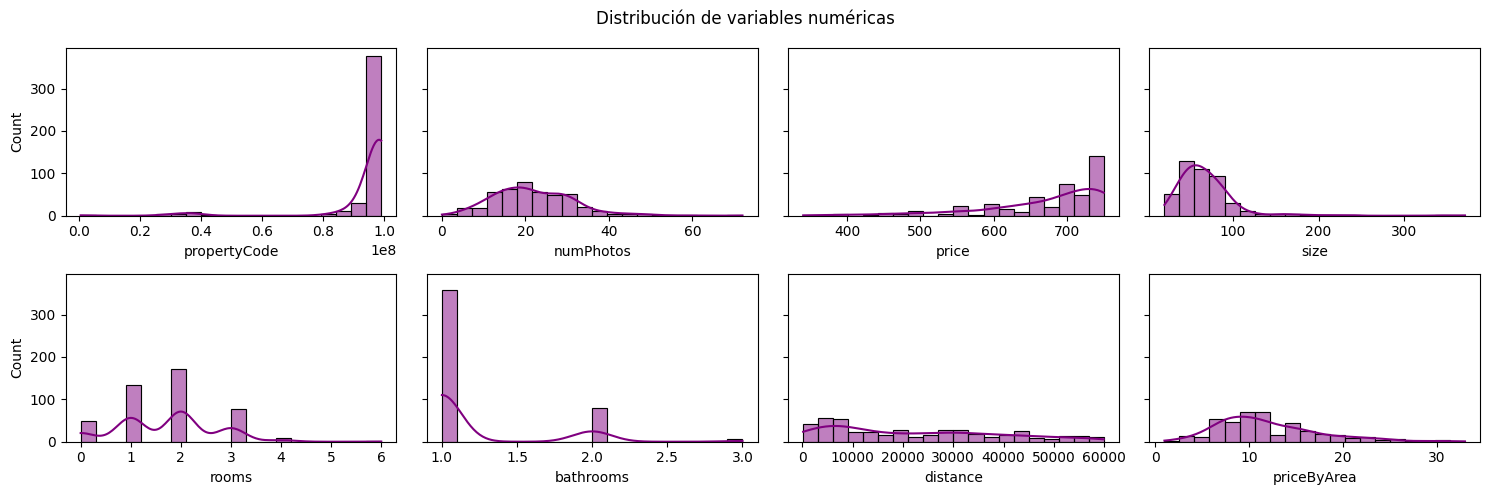

In [7]:
visualizador = sup_prep.Visualizador(df)
visualizador.plot_numericas(color='purple', kde=True)

---
---

## Dada que nuestra variable respuesta es **'price'**, voy a ver que valores tengo en algunas de las otras variables (principalmente categoricas) que apriori, considero que pueden tener relación con nuestra variable respuesta en caso de que haya que cambiar el formato o simplemente saber que valores tenemos.

### (las variables numericas ya hemos visto mediante el .describe() y la visualización que de primeras, no tenemos datos raros)
## Las variables son:
- ```propertyType``` (Tipo de propiedad)[flat, studio, duplex, ...]
- ```district``` (Distrito donde se encuentra la propiedad)[Centro, Villaverde, San Blas, ...]
- ```neighborhood``` ( Barrio dentro del distrito)[Lavapiés-Embajadores, Villaverde Alto, ...]
- ```operation``` Todos son 'rent'
- ```province``` [Madrid, Toledo, ...]
- ```municipality``` [Madrid, Parla, Seseña, ...]
- ```status``` [good, newdevelopment, renew] 
- ```floor``` [1, bj, 3, ...]

In [8]:
df['propertyType'].value_counts()

propertyType
flat            348
studio           48
duplex           19
penthouse        16
chalet            9
countryHouse      2
Name: count, dtype: int64

In [9]:
df['district'].value_counts()

district
Centro                                       48
Villaverde                                   23
Puente de Vallecas                           17
El Quiñón                                    13
Tetuán                                       13
San Blas                                     12
Carabanchel                                  11
Ciudad Lineal                                10
Latina                                        9
Suroeste                                      9
Arganzuela                                    7
Villa de Vallecas                             6
Fuencarral                                    6
Hortaleza                                     6
Reyes Católicos                               5
Retiro                                        5
Centro Urbano                                 4
Casco Histórico                               4
Hospital                                      4
Reyes                                         4
Nuevo Aranjuez-Ciudad de las Ar

In [10]:
df['neighborhood'].value_counts()

neighborhood
Lavapiés-Embajadores                     11
Villaverde Alto                           9
San Diego                                 8
Valdeacederas                             8
Los Rosales                               7
Rejas                                     6
Chueca-Justicia                           4
Palacio                                   4
Amposta                                   4
Pinar del Rey                             4
Butarque                                  4
Palos de Moguer                           4
Berruguete                                3
Casco Histórico de Barajas                3
Casco Antiguo                             3
Ensanche de Vallecas - La Gavia           3
Numancia                                  3
Palomeras sureste                         3
San Isidro                                3
Aluche                                    3
San Cristóbal                             3
Águilas                                   3
Casco Histórico de 

In [11]:
df['operation'].value_counts()

operation
rent    442
Name: count, dtype: int64

In [12]:
df['province'].value_counts()

province
Madrid         353
Toledo          59
Guadalajara     21
Segovia          8
Ávila            1
Name: count, dtype: int64

In [13]:
df['municipality'].value_counts()

municipality
Madrid                        170
Alcalá de Henares              22
Parla                          14
Seseña                         14
Aranjuez                       11
Torrejón de Ardoz              11
Getafe                         10
Guadalajara                     8
Valdemoro                       7
San Sebastián de los Reyes      6
Yebes                           6
Alcorcón                        6
Collado Villalba                6
Coslada                         5
Yeles                           5
Colmenar Viejo                  5
El Espinar                      4
Arganda                         4
Pinto                           4
Fuensalida                      4
San Ildefonso o la Granja       4
Illescas                        4
Móstoles                        3
Leganés                         3
Miraflores de la Sierra         3
Casarrubios del Monte           3
Villanueva del Pardillo         3
Cobeña                          3
Yuncos                          3
G

In [14]:
df['status'].value_counts()

status
good              409
newdevelopment     13
renew               2
Name: count, dtype: int64

### (aqui podemos ver algunos valores que tienen un formato diferentes a los demas que serian "numericos" pero no pasa nada)

In [15]:
df['floor'].value_counts()

floor
1     94
2     75
bj    67
3     59
4     36
5     11
en     6
8      5
6      4
st     1
7      1
14     1
ss     1
Name: count, dtype: int64

<h2 style="color: #00FFFF"><b><u>
CONCLUSIONES
</u></b></h2>

### 1. Hemos visto que (afortunadamente para nosotros) no tenemos valores con formatos raros en nuestras variables categoricas las cuales hemos considerado que nos pueden interesar.

### 2. Para acotar mas el estudio, voy a quedarme con solo las propiedades que pertenecen a la provincia de Madrid para entrenar mi modelo ya que representan el 80% de los datos.

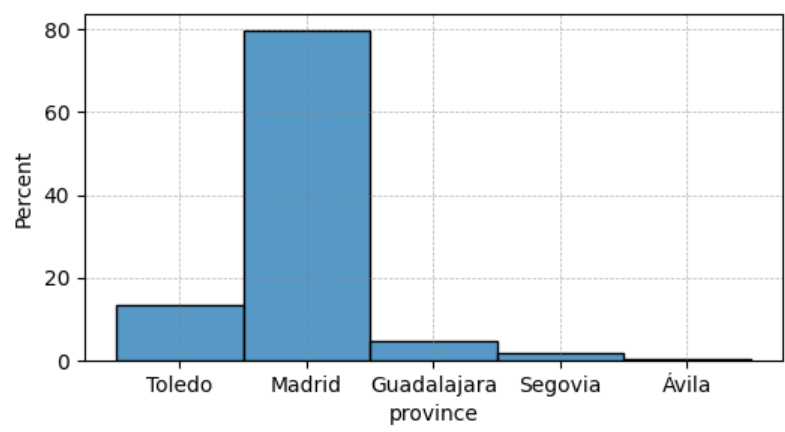

---
---

## Nos quedamos solo con las propiedades las cuales pertenecen a la comunidad de Madrid.

In [16]:
df_provincia_madrid = df[df['province'] == "Madrid"]
df_provincia_madrid.shape

# exportamos los datos
df_provincia_madrid.to_csv('../datos/tratados/propiedades_provincia_madrid.csv')

---
---

## Redefinimos ```df```.

In [17]:
df = pd.read_csv('../datos/tratados/propiedades_provincia_madrid.csv', index_col=0).reset_index(drop=True)
df.sample()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
94,98920120,6,500.00,flat,rent,45.00,True,1,1,Valdemorillo pueblo,Madrid,Valdemorillo,es,405.000.981,-40.675.866,False,32188,REDPISO VALDEMORILLO ALQUILA piso de una habit...,False,good,False,11.00,{'typology': 'flat'},"{'subtitle': 'Valdemorillo pueblo, Valdemorill...",False,False,False,False,False,False,RP2462022104557,NaN,Valdemorillo pueblo,NaN,False,NaN,NaN,NaN


## Ahora eliminamos variables que no nos son relevantes para nuestro estudio o no podemos usar.

- ```operation``` (porque todos los pisos son de alquiler)
- ```country``` (porque todas las propiedades pertenecen a españa)
- ```description``` (no es un dato relevante para nuestro estudio)
- ```priceByArea``` (la eliminamos porque solo nos va a generar ruido y al final es una variable derivada de nuestra variabe repuesta 'precio')
- ```detailedType``` (viene a ser como 'propertyType' y no nos aporta informacion nueva)
- ```suggestedTexts``` (no nos es relevante)
- ```hasStaging``` (tiene como valor 'False" en todas nuestras propiedades)
- ```superTopHighlight``` (tiene como valor 'False" en todas nuestras propiedades)
- ```externalReference``` (no es relevante para nuestro estudio)
- ```parkingSpace``` (podríamos sacar más columnas de aquí, pero dado que es casi el mismo valor para todos nuestros datos, la voy a quitar por el momento)
- ```labels``` (no es relevante para nuestro estudio)
- ```newDevelopmentFinished``` (tenemos mas del 96% como valor nulo)
- ```province``` (lo eliminnamos porque todas las propiedades ahora son de Madrid)

In [19]:
df.drop(columns=['operation', 'country', 'description', 'priceByArea', 'detailedType', 'suggestedTexts', 'hasStaging', 'superTopHighlight', 'externalReference', 'parkingSpace', 'labels', 'newDevelopmentFinished', 'province'],
        inplace=True)

## Vemos la correlación entre las variables.

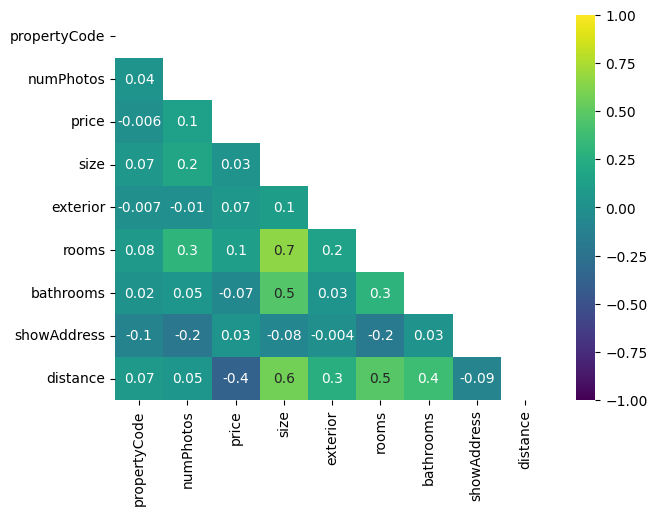

In [20]:
visualizador2 = sup_prep.Visualizador(df)
visualizador2.correlacion()

### Podemos ver que hay un relación entre el tamaño y el número de habitaciones y cuartos de baño que tiene la propiedad. Lo cual, tiene sentido.

In [24]:
sup_nul.porcentaje_nulos(df)

neighborhood        50.71
floor               17.85
district            14.73
hasLift              5.10
hasVideo             3.97
status               3.97
newDevelopment       3.97
hasPlan              3.97
has3DTour            3.97
has360               3.97
topNewDevelopment    3.97
dtype: float64